In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

queries.shape (80, 8)
keys.shape (80, 8)
values.shape (80, 8)
product.shape (80, 80)
scaled_product.shape (80, 80)
attention_score.shape (80, 80)
attention.shape (80, 8)


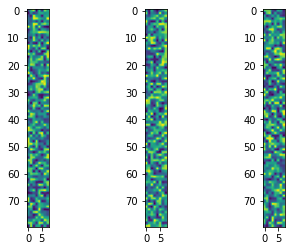

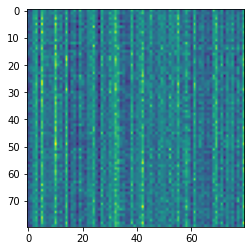

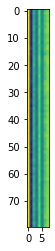

In [15]:
# (seqeunce_length, embedding_dim) = (88, 8)

def scaled_self_attention(queries, keys, values):
    print("queries.shape", queries.shape)
    print("keys.shape", keys.shape)
    print("values.shape", values.shape)

    # Q dot KT
    product = tf.matmul(queries, keys, transpose_b=True)
    print("product.shape", product.shape)

    # Divide by keys dimension
    keys_dim = tf.cast(tf.shape(keys)[1], tf.float32) 
    scaled_product = product / tf.math.sqrt(keys_dim)
    print("scaled_product.shape", scaled_product.shape)

    # Attention score
    attention_score = tf.nn.softmax(scaled_product, axis=-1)
    print("attention_score.shape", attention_score.shape)

    # Multiply
    attention = tf.matmul(attention_score, values)
    print("attention.shape", attention.shape)

    return attention, attention_score


# initiate random values
queries = np.random.random((80, 8)).astype("float32")
keys = np.random.random((80, 8)).astype("float32")
values = np.random.random((80, 8)).astype("float32")

attention, attention_score = scaled_self_attention(queries, keys, values)

plt.subplot(1, 3, 1)
plt.imshow(queries)
plt.subplot(1, 3, 2)
plt.imshow(keys)
plt.subplot(1, 3, 3)
plt.imshow(values)
plt.show()
plt.close()

plt.imshow(attention_score)
plt.show()
plt.close()

plt.imshow(attention)
plt.show()
plt.close()